c:\Users\louis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

Gradient Boosting Regression: MAE = 1.917
Random Forest Regression: MAE = 2.095
AdaBoost Regression: MAE = 2.491
Decision Tree Regression: MAE = 2.526
Ridge Regression: MAE = 3.133
Linear Regression: MAE = 3.189
ElasticNet Regression: MAE = 3.244
Lasso Regression: MAE = 3.254
K-Nearest Neighbors Regression: MAE = 3.664
Multi-layer Perceptron Regression: MAE = 4.324
Support Vector Regression: MAE = 4.531


c:\Users\louis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


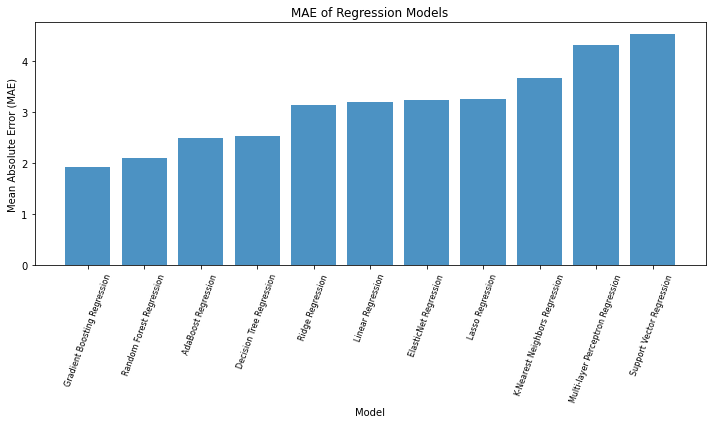

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
boston = load_boston()
X = boston.data
y = boston.target

# Step 2: Define the models to compare
models = [
    ('Linear Regression', LinearRegression()),
    ('Lasso Regression', Lasso()),
    ('Ridge Regression', Ridge()),
    ('ElasticNet Regression', ElasticNet()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('AdaBoost Regression', AdaBoostRegressor()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Support Vector Regression', SVR()),
    ('Multi-layer Perceptron Regression', MLPRegressor())
]

# Step 3: Compare the models using train-test split
results = []
for name, model in models:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results.append((name, mae))

# Step 4: Sort and print the results
results.sort(key=lambda x: x[1])  # sort results based on MAE
for name, mae in results:
    print(f'{name}: MAE = {mae:.3f}')

# Step 5: Create the bar plot
model_names = [name for name, _ in results]
mae_values = [mae for _, mae in results]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(model_names, mae_values, align='center', alpha=0.8)
ax.set_xlabel('Model')
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_title('MAE of Regression Models')

plt.xticks(rotation=70, fontsize=8)
plt.tight_layout()
plt.show()